# EDA -- REVIEWS DE YELP

COMIENZO A ANALIZAR EL REVIEWS DE YELP

In [1]:
import ast
import json
import pandas as pd
import numpy as np
import jsonlines
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Cargo el dataset

In [2]:
data = []
with jsonlines.open(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\review.json') as reader:
    for obj in reader:
        data.append(obj)

df_review = pd.DataFrame(data)
df_review 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


Quiero ver valores faltantes y columnas

In [3]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


Se analizan los tipos de datos presentes en cada columna

In [4]:
df_review.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Podemos ver que no hay ningun valor faltante ni valores nulos.

Quiero los valores unicos de Stars

In [5]:
df_review['stars'].unique()

array([3., 5., 4., 1., 2.])

# Gráficos

Analizamos algunas muestras

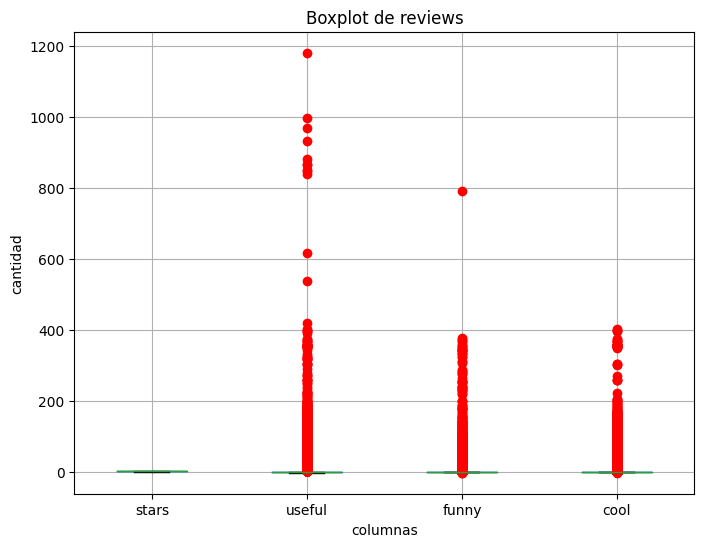

In [6]:

plt.figure(figsize=(8,6))
df_review.boxplot(column=['stars','useful','funny','cool'], sym='ro')
plt.title('Boxplot de reviews')
plt.xlabel('columnas')
plt.ylabel('cantidad')

plt.show()

Existen muchas cantidad de outliers en la columna 'useful', 'funny' y 'cool' . La columna Stars esta con parametros correctos. 
La gran cantidad de valores bajos en el boxplot indica que la mayoría de los usuarios participa de manera moderada, publicando pocas reseñas y recibiendo pocos votos en las diferentes categorías.

Nube de palabras

In [7]:
# Tomar las primeras 1000 filas de la columna 'text'
df_review_subset = df_review.head(10000)

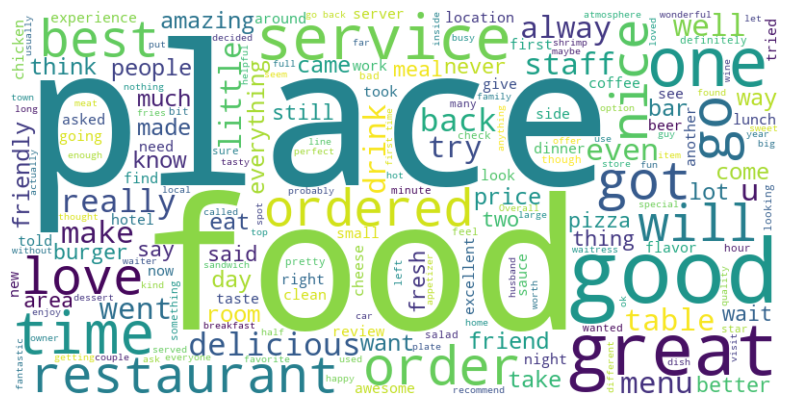

In [8]:
text = " ".join(review for review in df_review_subset.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

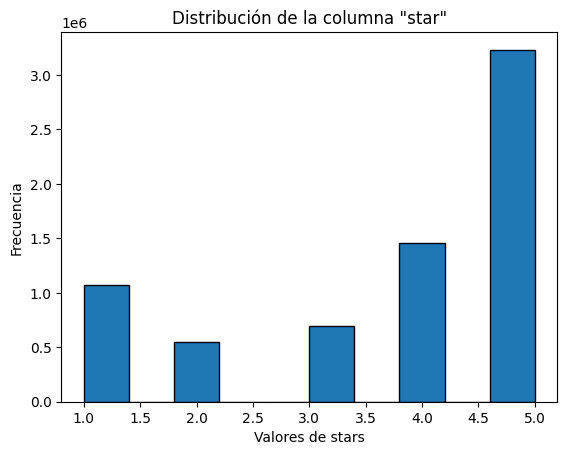

In [9]:
tam_muestra = 1000
muestra = pd.read_json(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\review.json',
                      lines=True, chunksize=tam_muestra)

valores = []

for valor in muestra:
    
    valores_uso = valor['stars']
    
    valores.extend(valores_uso)


plt.hist(valores, bins=10, edgecolor='black')
plt.xlabel('Valores de stars')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna "star"')
plt.show()


Se ve una tendencia de mayor frecuencia de puntuaciones por encima de 3.5 en las reseñas.
La mayoría de las experiencias de los usuarios son positivas. Vemos que los usuarios tienden a calificar favorablemente los negocios que están revisando.



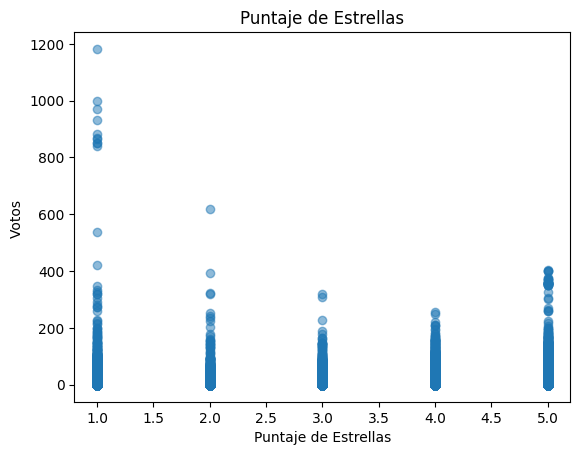

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


tam_muestra = 10000
muestra = pd.read_json(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\review.json',
                      lines=True, chunksize=tam_muestra)

useful_list = []
stars_list = []


for data_block in muestra:
    useful_list.extend(data_block['useful'])
    stars_list.extend(data_block['stars'])


plt.scatter(stars_list, useful_list, alpha=0.5)
plt.xlabel('Puntaje de Estrellas')
plt.ylabel('Votos ')
plt.title('Puntaje de Estrellas')
plt.show()

En este gráfico queda en evidencia que con las estrellas con valores mas bajos hay mas interaccion,  siendo este review muy calificado como 'useful' por otros usuarios.


# Datasets TIP


Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.

In [11]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\tip.json') as reader:
    for obj in reader:
        data.append(obj)

# Convertir la lista de objetos JSON en un DataFrame
df_tips = pd.DataFrame(data)
df_tips

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


Se revisan algunas columas, tipos de datos y nulos

In [12]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [13]:
df_tips.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [14]:
df_tips['compliment_count'].value_counts()

compliment_count
0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: count, dtype: int64

Podemos notar que no hay presencia de valos nulos

# Gráficos

Comencemos a analizar con una nube de palabras sobre una muestra de 10000 filas cuales se repiten más

In [15]:
muestra_tip = df_tips.head(10000)

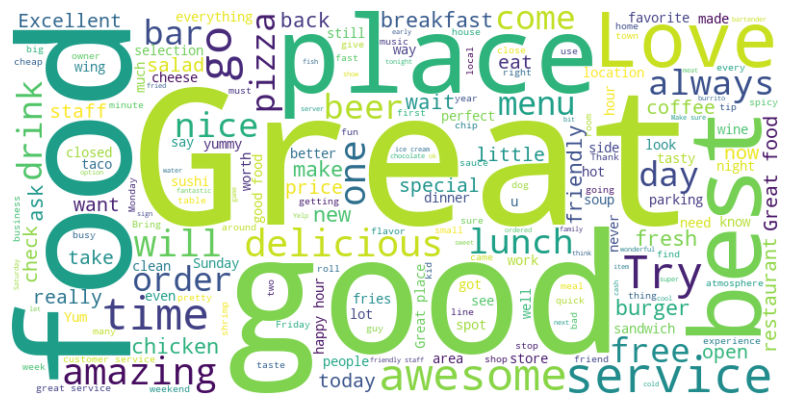

In [16]:

text = " ".join(review for review in muestra_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se puede observar que parece existir una tendencia a dejar comentarios buenos y favorables, dado que resaltan palabras como 'great', 'best' ,'good'.

Intentemos con un filtro, por ejemplo donde aparezca la palabra 'food' para conocer las palabras o frases asociadas que más se repiten.

In [17]:
filtro = df_tips[df_tips['text'].str.contains('food', case=False)]

muestra2_tip = filtro.head(10000)

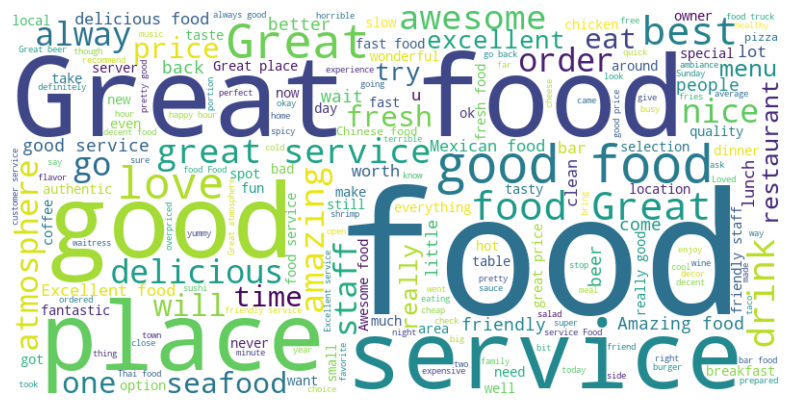

In [18]:
text2 = " ".join(review for review in muestra2_tip.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análisis de Comentarios en el Ámbito Gastronómico:

Al aplicar un filtro sobre la muestra de datos analizados, se observa una prevalencia de términos y frases favorables relacionados con el ámbito gastronómico. Palabras y expresiones como "great food", "good", y "great service" son recurrentes en los comentarios, indicando una tendencia predominante hacia evaluaciones positivas. Esto sugiere que, en el dataset analizado (TIPS), los comentarios favorables superan en cantidad a las quejas.

# Dataset check in

Creo dataframe

In [19]:
data = []

# Leer el archivo JSON Lines
with jsonlines.open('D:\Denise_Estudio\henry\Proyecto final\data\Yelp\checkin.json') as reader:
    for obj in reader:
        data.append(obj)

df_check = pd.DataFrame(data)
df_check

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


Revisamos columnas, tipos de datos, nulos 

In [20]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


No hay presencia de nulos

Además podemos ver de este dataset que conotiene la informacion referida a cada negocio asociado por su id, y fechas de registros o cambios que se generen dentro de la plataforma, lo cual nos brinda informacion de los registros de cada negocio y en que fecha se realizo.

# Dataset business

Contiene información del comercio, incluyendo localización, atributos y categorías.

Se crea el dataframe

In [21]:
df_business = pd.read_pickle(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\business.pkl')

Se busca informacion sobre las columnas, variables y valores nulos

In [22]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [24]:
df_business.isna().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

Se observa que hay columnas repetidas, las cuales tienen demasiados nulos, dado que hablamos de gran porcentaje opto por borrarlas ya que no podran brindar informacion útil


In [25]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [26]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


Busco valores duplicados revisando id

In [27]:
duplicates = df_business.duplicated(subset=['business_id'], keep=False)
duplicate_ids = df_business[duplicates]['business_id'].unique()
duplicate_ids


array([], dtype=object)

No se encuentran valores duplicados

In [28]:
df_business.isna().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [29]:
df_business['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                          1012
Restaurants, Pizza                                                                                                   935
Nail Salons, Beauty & Spas                                                                                           934
Pizza, Restaurants                                                                                                   823
Restaurants, Mexican                                                                                                 728
                                                                                                                    ... 
Restaurants, Specialty Food, Food, Sandwiches, Italian                                                                 1
Professional Services, Accountants, Financial Services, Tax Services                                                   1
Caterers, Convenience

Analicemos por estados, que valores hay y en cuales hay mayores frecuencias

In [30]:
unique_states = df_business['state'].nunique()
unique_states

27

In [31]:
df_business['state'].value_counts()


state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
HI         2
MA         2
WA         2
UT         1
NC         1
MI         1
MT         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

Analisis de manera Gráfica

C:\Users\ezequ\AppData\Local\Temp\ipykernel_12260\2240717076.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\ezequ\AppData\Local\Temp\ipykernel_12260\2240717076.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


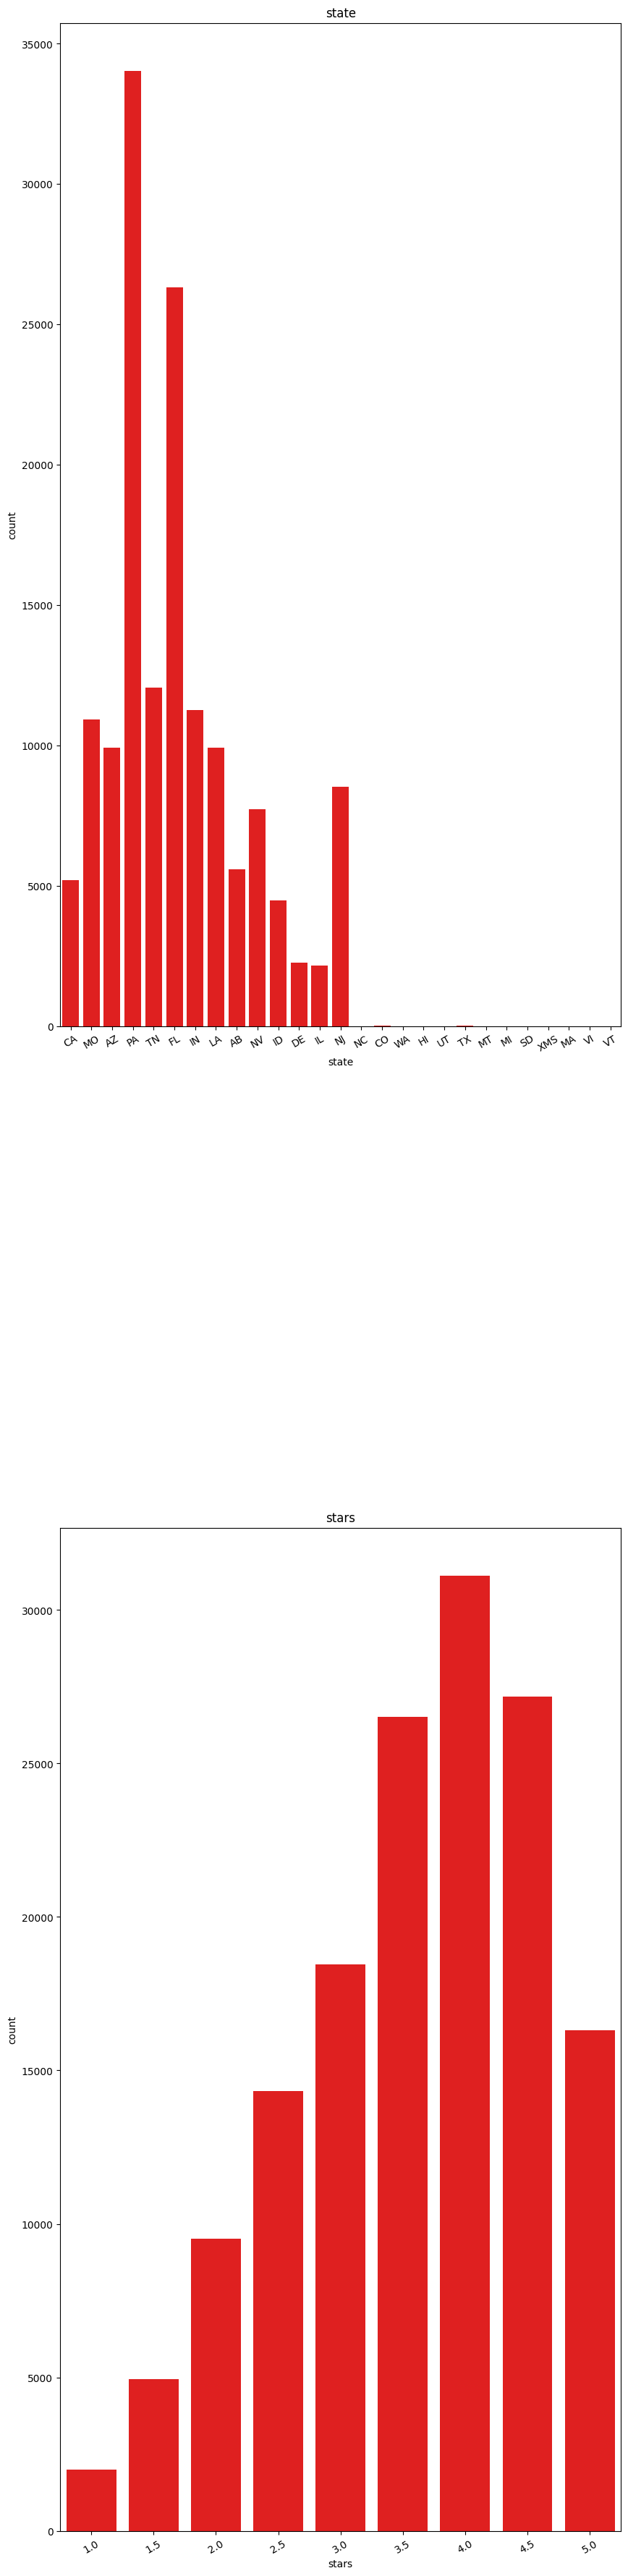

In [86]:
columnas = ["state","stars"]

#Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(columnas),ncols =1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_business,ax=ax[i], color='red')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [32]:
mayores_negocios = df_business.name.value_counts()

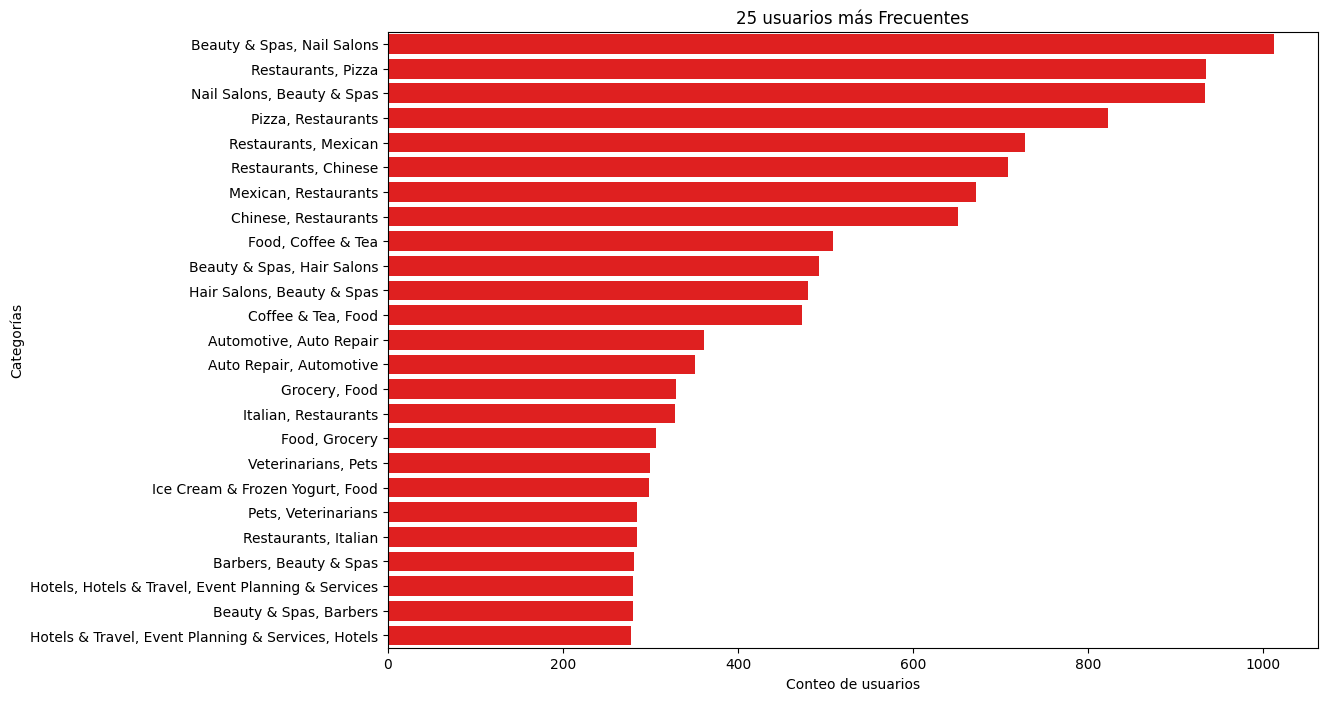

In [90]:
categoria_counts =df_business['categories'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 caaategorías más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, color='red')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

Se pueden analizar las categorias de negocios que más se repiten, siendo los más repetidos salones de belleza, restaurantes (que difieren en categorias entre ellos) y hoteles.

In [33]:
mayores_negocios.head(20)

name
Starbucks                724
McDonald's               703
Dunkin'                  510
Subway                   459
Taco Bell                365
CVS Pharmacy             345
Walgreens                341
Burger King              338
Wendy's                  331
Wawa                     307
Domino's Pizza           295
The UPS Store            281
Pizza Hut                272
Enterprise Rent-A-Car    232
Papa John's Pizza        196
Great Clips              185
Jimmy John's             175
US Post Office           174
KFC                      171
Chick-fil-A              162
Name: count, dtype: int64

Podemos observar que la matoria de cadenas que se repiten son del ámbito gastronómico, vamos a verlo de manera gráfica.

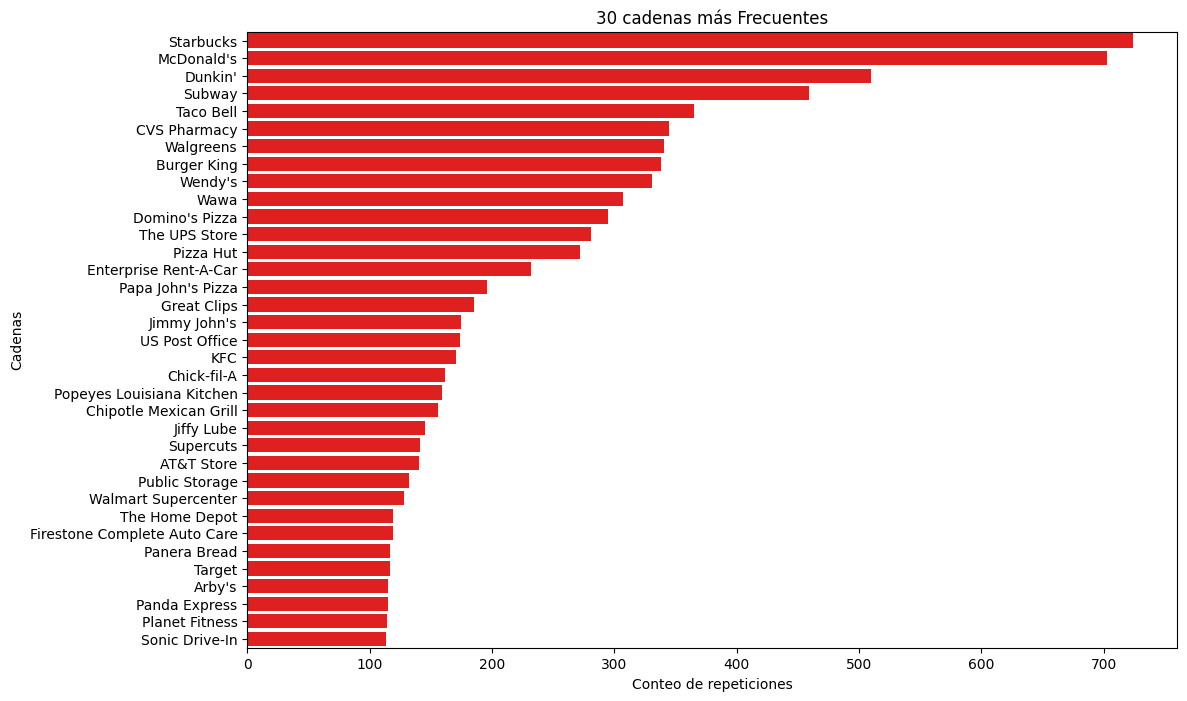

In [34]:
business_count = df_business['name'].value_counts()
top_30_categorias = business_count.head(35)

import seaborn as sns 

plt.figure(figsize=(12, 8))
sns.barplot(x=top_30_categorias.values, y=top_30_categorias.index, color='Red')
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Cadenas')
plt.title('30 cadenas más Frecuentes')
plt.show()

Podemos notar que en su mayoria existen muchisimos negocios usuarios de Yelp que sse corresponden al rubro gastronomico, viendo aqui los mejores por filtrado de la columna 'name', que corresponden a las mas grandes cadenas existentes en USA.

Filtremos esto para ver quienes tienen mayor frecuencia en un Estado puntual, California.

In [35]:
df_business_california = df_business.loc[df_business['state'] == 'CA']
df_business_california


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
88,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,08102,39.94669,-75.123327,4.5,6,1,"{'BusinessParking': '{'garage': False, 'street...","Juice Bars & Smoothies, Restaurants, Fruits & ...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
94,ZM46RDLXaFNo_z6t-j_L4w,Absolutely Perfect Inc,1153 Byberry Rd,Bensalem,CA,19020,40.113121,-74.914597,3.5,5,1,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Masonry/Concrete, Gardeners, Lawn Services, Tr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
123,iPSPcprSnkLOuL1Ns8UZZA,Pete's Barber Shop,1209 N 29th St,Philadelphia,CA,19121,39.97488,-75.183262,4.5,12,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Barbers, Beauty & Spas",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150267,kdwqGOQm_08KEmAqlbEjqg,Iora Primary Care,8616 E Broadway Blvd,Tucson,CA,85710,32.219866,-110.808491,5.0,5,1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...","Health & Medical, Doctors, Family Practice, In...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
150275,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,CA,85701,32.221828,-110.967969,3.5,111,1,"{'BusinessParking': '{'garage': False, 'street...","Bars, Tapas Bars, Restaurants, Nightlife, Gast...","{'Tuesday': '17:0-2:0', 'Wednesday': '17:0-2:0..."
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,CA,19104,39.953391,-75.196765,4.0,8,0,"{'GoodForKids': 'False', 'RestaurantsReservati...","Restaurants, Food Stands",None
150293,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,CA,89431,39.534947,-119.765698,4.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Convenience Stores, Food, Automotive, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


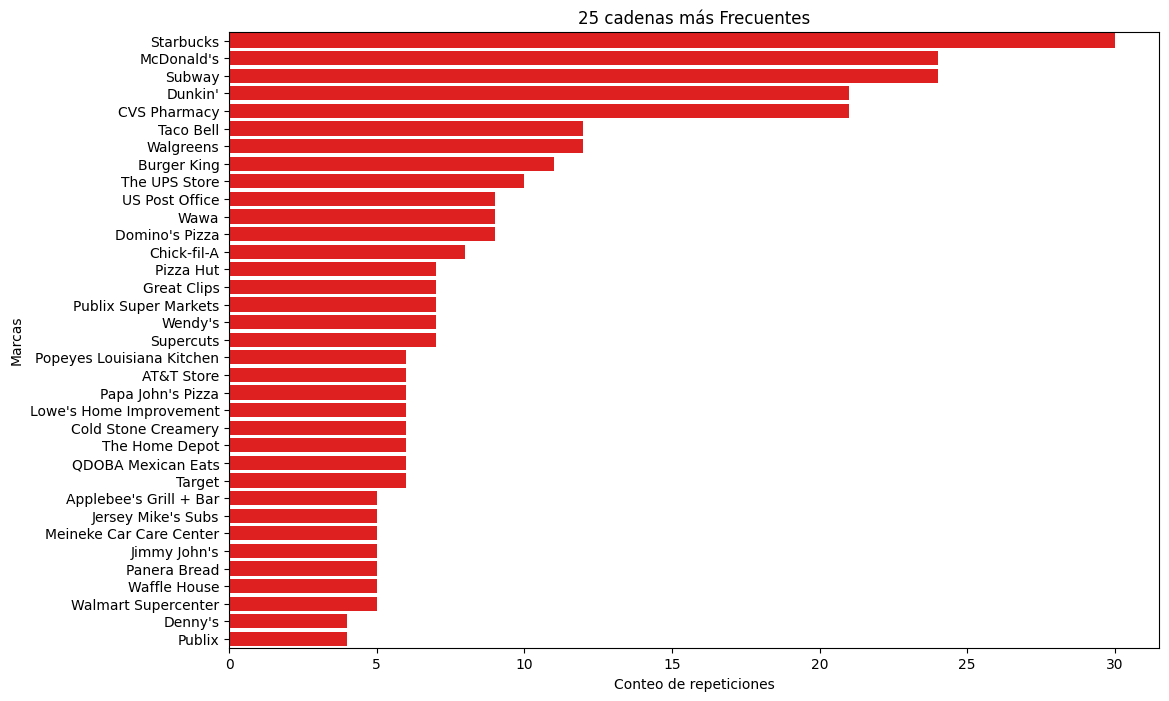

In [36]:
business_count_ca = df_business_california['name'].value_counts()
top_categorias = business_count_ca.head(35)

import seaborn as sns 

plt.figure(figsize=(12, 8))
sns.barplot(x=top_categorias.values, y=top_categorias.index, color='Red')
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Marcas')
plt.title('25 cadenas más Frecuentes')
plt.show()

En el Estado de California vemos que existen 30 locales Starsbucks, siendo la cadena con mayor presencia en el estado. Seguido de Mc Donal's y Subway 

Se realiza un merge para saber que establecimientos son

In [37]:
filtered_df = pd.merge(df_business_california, top_categorias, on='name', how='inner')
filtered_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,count
0,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",9
1,3uvFklejzRPwEPEZQ5vHYQ,Wawa,100 E Old Baltimore Pike,Media,CA,19063,39.916176,-75.387655,3.5,14,1,"{'Alcohol': 'u'none'', 'RestaurantsReservation...","Delis, Convenience Stores, Restaurants, Food, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",9
2,feVi5a5xZaahs4WsUfi1tw,CVS Pharmacy,3771 Tampa Rd,Oldsmar,CA,34677,28.0439,-82.6769,3.5,17,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Shopping, Drugstores, Food, Convenience Stores...","{'Monday': '8:0-22:0', 'Tuesday': '10:0-20:0',...",21
3,ruFtZKwlJASx5BTk1dh5AQ,Wendy's,440 N Mccarran Blvd,Sparks,CA,89431,39.538055,-119.734624,2.5,35,1,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Fast Food, Restaurants, Hot Dogs, Burgers","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",7
4,kgMEBZG6rjkGeFzPaIM4MQ,McDonald's,914 S Broad St,Philadelphia,CA,19146,39.93944,-75.166805,2.0,55,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Food, Restaurants, Coffee & Tea, Bu...","{'Monday': '6:0-0:0', 'Tuesday': '6:0-0:0', 'W...",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,t6F5E5a3Eo76wYCOQfiEzA,CVS Pharmacy,4133 G St,Philadelphia,CA,19124,40.011572,-75.11187,2.5,5,1,"{'RestaurantsTakeOut': 'False', 'WheelchairAcc...","Convenience Stores, Shopping, Pharmacy, Health...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",21
322,n_un56l2_pdJdqQlLZih4A,Walgreens,11010 Bloomingdale Ave,Riverview,CA,33578,27.894055,-82.319391,2.5,5,1,"{'Caters': 'False', 'ByAppointmentOnly': 'Fals...","Drugstores, Convenience Stores, Shopping, Beau...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",12
323,rGZBKCaV2AV7Fm4tFtXxdw,Burger King,2901 Clearacre Ln,Reno,CA,89512,39.557004,-119.791938,1.5,42,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Fast Food, Restaurants, Burgers","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",11
324,XzWSh90PT-45Ybo9kgeKfA,Supercuts,"105 S Dale Mabry Hwy Ste D, Kennedy Plaza",Tampa,CA,33609,27.944176,-82.506112,3.5,16,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Hair Salons, Barbers, Cosmetics & Beauty Suppl...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-20:0', '...",7


## Filtrar negocios con estrellas entre 3 y 5 estrellas  en todo el dataframe de business para saber luego las que no estan tan presentes y tienen mejoes reseñas

high_rating_df: Contiene solo las filas de filtered_df donde la calificación de estrellas está entre 2 y 5.
business_presence: Calcula cuántas veces aparece cada nombre en high_rating_df. Si se corrige el error y se convierte en un DataFrame, mostrará dos columnas: 'name' y 'frecuencia', donde 'frecuencia' es el número de veces que aparece cada nombre.

Filtrado de resultados entre 3 y 5 stars para tener los nombres de negocios con mejores reseñas



In [64]:
filtered_business = df_business[(df_business['stars'] >= 3) & (df_business['stars'] <= 5)]


In [65]:
name_count = filtered_business['name'].value_counts()
top_names = name_count.head(35)


Graficar los resultados

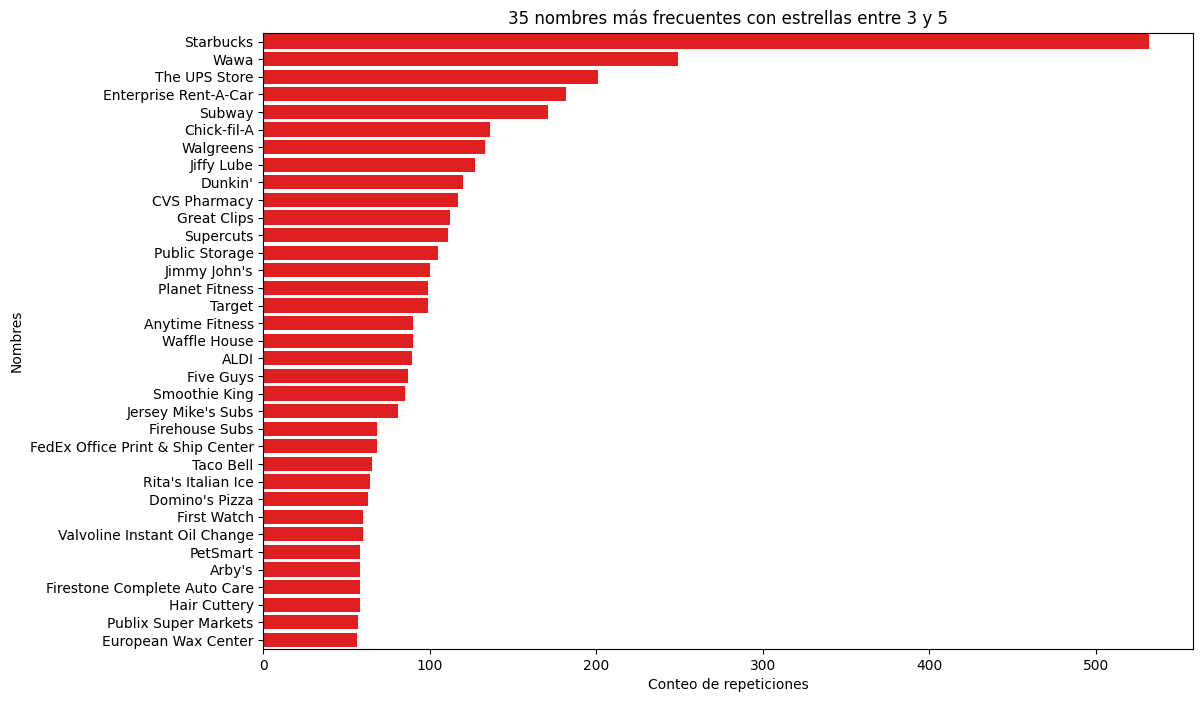

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_names.values, y=top_names.index, color='Red')
plt.xlabel('Conteo de repeticiones')
plt.ylabel('Nombres')
plt.title('35 nombres más frecuentes con estrellas entre 3 y 5')
plt.show()



Eje X (horizontal): Representa el conteo de repeticiones, es decir, la cantidad de veces que cada nombre de negocio aparece en las reseñas con calificaciones de entre 3 y 5 estrellas.

Eje Y (vertical): Muestra los nombres de los negocios más frecuentes dentro del rango de estrellas especificado.

Los negocios representados en este gráfico son aquellos que han recibido una cantidad significativa de reseñas con calificaciones de entre 3 y 5 estrellas, lo que puede implicar una satisfacción moderada a alta por parte de los usuarios.
La frecuencia de los nombres sugiere que estos negocios tienen una presencia notable en la base de datos de reseñas, posiblemente debido a su popularidad y amplia distribución.

# Conclusiones:

Este análisis visual permite identificar rápidamente qué negocios son los más mencionados dentro de las reseñas con calificaciones positivas y moderadas,proporcionando una visión sobre cuáles establecimientos tienen una mayor visibilidad y reciben una cantidad considerable de opiniones por parte de los usuarios.

Relacionando con el gráfico anterior, podemos seleccionar que cadenas presentes en este gráfico son las que tienen mejores reseñas a nivel nacional, para luego identificar en el Estado de California las que tengan oportunidad de crecimiento.


VAMOS A ANALIZARL ALGUNAS

In [69]:
burger_king_indices = df_business[df_business['name'] == 'Burger King'].index

# Usar iloc para seleccionar la columna 'categories' en esos índices
burger_king_categories = df_business.iloc[burger_king_indices][['name', 'categories']]

# Mostrar los resultados
print(burger_king_categories)

               name                                         categories
1329    Burger King                    Restaurants, Burgers, Fast Food
1571    Burger King          Hot Dogs, Burgers, Restaurants, Fast Food
1786    Burger King                    Burgers, Fast Food, Restaurants
2075    Burger King                    Restaurants, Burgers, Fast Food
2538    Burger King                    Fast Food, Restaurants, Burgers
...             ...                                                ...
148443  Burger King                    Fast Food, Restaurants, Burgers
148542  Burger King  Breakfast & Brunch, Restaurants, Burgers, Fast...
149252  Burger King          Burgers, Fast Food, Hot Dogs, Restaurants
149310  Burger King                    Fast Food, Restaurants, Burgers
150028  Burger King                    Burgers, Fast Food, Restaurants

[338 rows x 2 columns]


In [74]:
df_business.iloc[1329]['categories']

'Restaurants, Burgers, Fast Food'

In [70]:
taco_bell_indices = df_business[df_business['name'] == 'Taco Bell'].index

# Usar iloc para seleccionar la columna 'categories' en esos índices
taco_bell_categories = df_business.iloc[taco_bell_indices][['name', 'categories']]

# Mostrar los resultados
print(taco_bell_categories)

             name                                         categories
1067    Taco Bell  Restaurants, Tex-Mex, Breakfast & Brunch, Mexi...
1191    Taco Bell  Restaurants, Fast Food, Mexican, Tex-Mex, Taco...
2150    Taco Bell  Fast Food, Restaurants, Breakfast & Brunch, Ve...
3007    Taco Bell    Restaurants, Fast Food, Tex-Mex, Tacos, Mexican
3321    Taco Bell  Restaurants, Fast Food, Breakfast & Brunch, Me...
...           ...                                                ...
149074  Taco Bell  Restaurants, Tex-Mex, Breakfast & Brunch, Mexi...
149175  Taco Bell  Tex-Mex, Restaurants, Breakfast & Brunch, Fast...
149963  Taco Bell  Fast Food, Breakfast & Brunch, Restaurants, Ta...
150087  Taco Bell  Fast Food, Restaurants, Breakfast & Brunch, Ta...
150166  Taco Bell  Restaurants, Tex-Mex, Fast Food, Mexican, Taco...

[365 rows x 2 columns]


In [75]:
df_business.iloc[1067]['categories']

'Restaurants, Tex-Mex, Breakfast & Brunch, Mexican, Fast Food, Tacos'

# Dataset user

Este dataset contiene datos del usuario incluyendo referencias a otros usuarios amigos y a toda la metadata asociada al usuario.

Cargo el dataset

In [39]:
df_user = pd.read_parquet(r'D:\Denise_Estudio\henry\Proyecto final\data\Yelp\user.parquet')

In [40]:
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


Reviso los valores nulos

In [42]:
df_user.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

Este dataset posee multiples columnas con informacion referente a los usuaarios de Yelp, y diferentes promedios. No posee nulos o datos faltantes

Reviso si hay valores repetidos.

In [43]:
df_user.duplicated().sum()

np.int64(117700)

Existen 117700 filas repetidas, como esto no va a darme informacion fiable, decido eliminarlos para un mejor analisis

In [44]:
df_user.drop_duplicates(inplace=True)

Reviso los outliers en las columnas numéricas

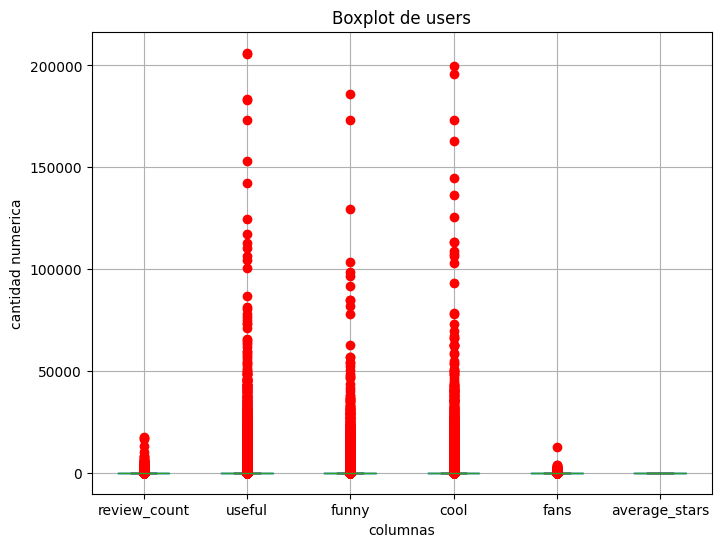

In [45]:

plt.figure(figsize=(8,6))
df_user.boxplot(column=['review_count','useful','funny','cool','fans','average_stars'], sym='ro')
plt.title('Boxplot de users')
plt.xlabel('columnas')
plt.ylabel('cantidad numerica')

plt.show()

Podemos ver que existen muchos valores outliers en cuanto a las columnas'useful','funny','cool' . Algunas pocas con datos de reviews y no hay outliers en average_stars, lo cual se corresponde a lo que cuenta la columna.

El gráfico boxplot presentado muestra la distribución de diferentes métricas de interacción de usuarios en un conjunto de datos. Las métricas evaluadas son:

review_count: La cantidad de reseñas realizadas por los usuarios.
useful: La cantidad de votos que indican que una reseña fue útil.
funny: La cantidad de votos que indican que una reseña fue divertida.
cool: La cantidad de votos que indican que una reseña fue genial.
fans: La cantidad de seguidores que tiene cada usuario.
average_stars: La calificación promedio de las reseñas de cada usuario.

La mayoría de los usuarios tienen valores bajos en todas las métricas evaluadas, lo cual se refleja en la concentración de datos cerca del eje horizontal.
Hay presencia de numerosos valores atípicos (outliers) que se extienden hacia valores muy altos en todas las métricas, especialmente en las categorías de 'useful', 'funny' y 'cool'.

Las métricas 'useful', 'funny' y 'cool' muestran una gran cantidad de valores atípicos que alcanzan hasta los 200,000 votos, indicando que algunos usuarios reciben una cantidad excepcionalmente alta de interacciones en sus reseñas.

La alta concentración de valores bajos en el boxplot sugiere que la mayoría de los usuarios tienen una participación moderada, con pocas reseñas y votos en las distintas categorías.

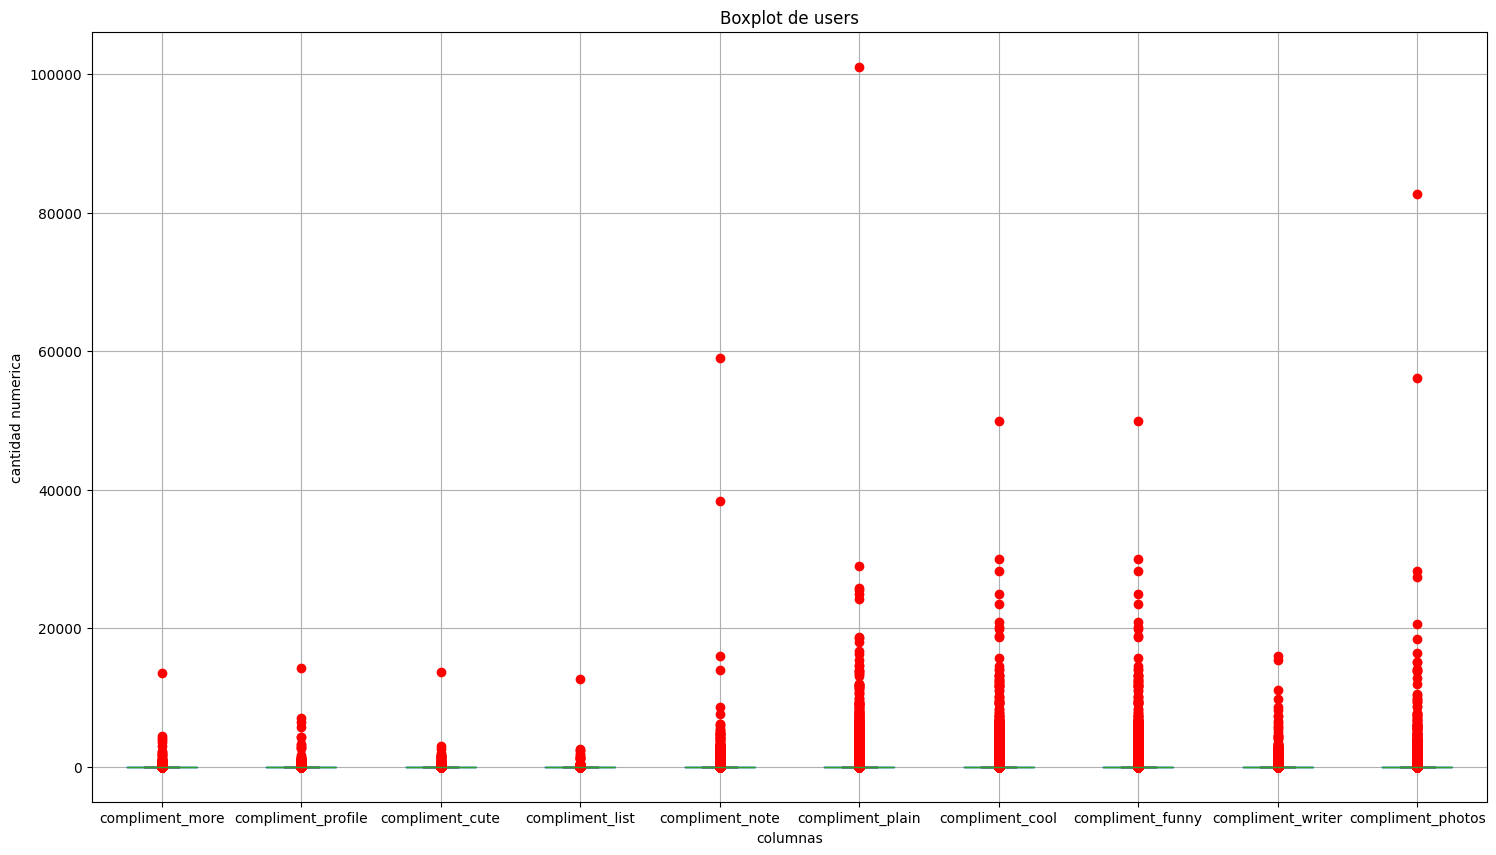

In [46]:

plt.figure(figsize=(18,10))
df_user.boxplot(column=['compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'], sym='ro')
plt.title('Boxplot de users')
plt.xlabel('columnas')
plt.ylabel('cantidad numerica')

plt.show()

El gráfico boxplot muestra la distribución de diferentes tipos de cumplidos recibidos por los usuarios.
 
Las categorías evaluadas son:

1) compliment_more: Más cumplidos.
2) compliment_profile: Cumplidos sobre el perfil.
3) compliment_cute: Cumplidos por ser lindo/a.
4) compliment_list: Cumplidos por listas.
5) compliment_note: Cumplidos por notas.
6) compliment_plain: Cumplidos sencillos.
7) compliment_cool: Cumplidos por ser genial.
8) compliment_funny: Cumplidos por ser gracioso/a.
9) compliment_writer: Cumplidos por ser buen escritor/a.
10) compliment_photos: Cumplidos por fotos.

Existen varios valores atípicos (outliers) que se extienden hacia valores muy altos, particularmente en las categorías de 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', y 'compliment_photos'. Estos valores atípicos resaltan la existencia de usuarios altamente reconocidos o populares, quienes reciben una cantidad significativamente mayor de cumplidos en comparación con el promedio.

Quiero analizar las mejores oportunidades de negocios, por lo que se buscaran franquicias con pocas sucursales y buenas reseñas.

Para esto me dirijo a al dataframe reviews de Yelp.

In [47]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [48]:
average_stars = df_review.groupby('business_id')['stars'].sum()

top_business = average_stars.sort_values(ascending=False).head(30)

top_business

business_id
_ab50qdWOk0DdB6XOrBitw    31651.0
ac1AeYqs8Z4_e2X5M3if2A    31163.0
GXFMD0Z4jEVZBCsbPf4CTQ    27389.0
ytynqOUb3hjKeJfRj5Tshw    26610.0
oBNrLz4EDhiscSlbOl8uAw    22589.0
_C7QiQQc47AOEv4PE3Kong    21327.0
VQcCL9PiNL_wkGf-uF3fjg    19486.0
GBTPC53ZrG1ZBY3DT8Mbcw    19471.0
6a4gLLFSgr-Q6CZXDLzBGQ    18755.0
I_3LMZ_1m2mzR0oLIOePIg    18276.0
iSRTaT9WngzB8JJ2YKJUig    18067.0
1b5mnK8bMnnju_cvU65GqQ    17715.0
gTC8IQ_i8zXytWSly3Ttvg    17663.0
yPSejq3_erxo9zdVYTBnZA    17459.0
VaO-VW3e1kARkU9bP1E7Fw    15982.0
qb28j-FNX1_6xm7u372TZA    15548.0
VVH6k9-ycttH3TV_lk5WfQ    15457.0
ctHjyadbDQAtUFfkcAFEHw    14433.0
QHWYlmVbLC3K6eglWoHVvA    13941.0
PP3BBaVxZLcJU54uP_wL6Q    13910.0
L5LLN0RafiV1Z9cddzvuCw    13194.0
9PZxjhTIU7OgPIzuGi89Ew    12943.0
dsfRniRgfbDjC8os848B6A    12875.0
6ajnOk0GcY9xbb5Ocaw8Gw    12690.0
C9K3579SJgLPp0oAOM29wg    12639.0
VAeEXLbEcI9Emt9KGYq9aA    12557.0
U3grYFIeu6RgAAQgdriHww    12201.0
j-qtdD55OLfSqfsWuQTDJg    11959.0
ww3YJXu5c18aGZXWmm00qg    11848.0
xl

In [52]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 348.8+ MB
